# AI & ML Internship — Task 7
## Logistic Regression: Titanic Survival Prediction

### Objective:
- Build a binary classification model to predict passenger survival
- Perform proper data cleaning and feature encoding
- Train a Logistic Regression model
- Evaluate performance using classification metrics
- Analyze results using confusion matrix and ROC-AUC


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Model
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


In [3]:
# Load Titanic dataset from seaborn
df = sns.load_dataset("titanic")

print("Dataset loaded successfully")
print("Shape:", df.shape)

df.head()


Dataset loaded successfully
Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
print("Dataset Info:\n")
df.info()

print("\nStatistical Summary:\n")
df.describe()


Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB

Statistical Summary:



,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df = df[
    ["survived", "age", "sex", "fare", "pclass", "embarked"]
]

df.head()


,survived,age,sex,fare,pclass,embarked
0,0,22.0,male,7.2500,3,S
1,1,38.0,female,71.2833,1,C
2,1,26.0,female,7.9250,3,S
3,1,35.0,female,53.1000,1,S
4,0,35.0,male,8.0500,3,S


In [7]:
# Fill missing Age with median
df["age"] = df["age"].fillna(df["age"].median())


# Fill missing Embarked with mode
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

df.isnull().sum()


survived    0
age         0
sex         0
fare        0
pclass      0
embarked    0
dtype: int64

In [8]:
X = df.drop("survived", axis=1)
y = df["survived"]

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (891, 5)
Target shape: (891,)


In [9]:
numeric_features = ["age", "fare"]
categorical_features = ["sex", "embarked", "pclass"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (712, 5)
Testing size: (179, 5)


In [11]:
model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", LogisticRegression(max_iter=1000))
    ]
)

model.fit(X_train, y_train)

print("Logistic Regression model trained successfully")


Logistic Regression model trained successfully


In [12]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1-score : {f1:.4f}")


Accuracy : 0.7709
Precision: 0.7188
Recall   : 0.6667
F1-score : 0.6917


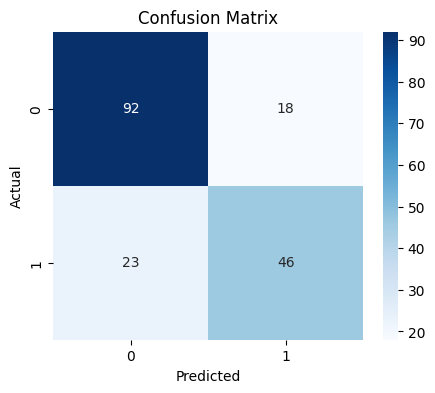

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()


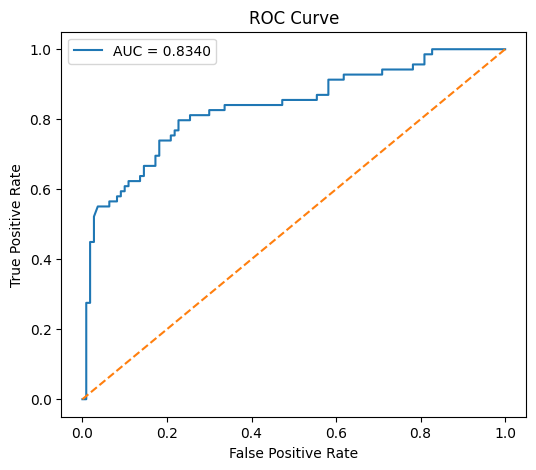

AUC Score: 0.83399209486166


In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

plt.savefig("roc_curve.png", dpi=300, bbox_inches="tight")
plt.show()

print("AUC Score:", auc_score)


In [16]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       110
           1       0.72      0.67      0.69        69

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.75       179
weighted avg       0.77      0.77      0.77       179

